In [1]:
import matplotlib.pyplot as plt
import keras_ocr
from PIL import Image
import numpy as np

In [86]:
img = np.array(Image.open('bohemina_poster.jpg'))

# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

# Get a set of three example images
images = [img]

# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
prediction_groups = pipeline.recognize(images)

Looking for C:\Users\kwansu\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\kwansu\.keras-ocr\crnn_kurapan.h5


In [89]:
with open("Pred_002.txt", "w") as f:
    for val in prediction_groups[0]:
        for i in range(4):
            f.write(f'{int(val[1][i][0])} {int(val[1][i][1])} ')
        f.write(f'##::{val[0]}\n')

In [31]:
prediction_groups[0][0][1][3]

array([537.5 , 236.25], dtype=float32)

C:\Users\kwansu\anaconda3\envs\ocr2\lib\site-packages\keras_ocr\tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


<AxesSubplot:>

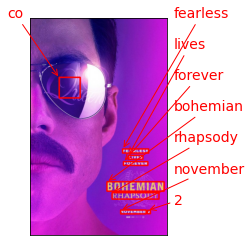

In [90]:
keras_ocr.tools.drawAnnotations(image=images[0], predictions=prediction_groups[0])

In [64]:
a = 'popeval/dataset_gt/IC13_focused_scene/Test/img_001.txt'
with open(a, "r") as f:
    line = f.readline()
    print(line)

32 39 151 40 129 214 43 214 T



In [81]:
from popeval.popEval import *

# GT_files = ['coord_001.txt']
# D_files = ['coord_002.txt']

GT_files = sorted(glob.glob('popeval/dataset_gt/IC13_focused_scene/Test/*.txt'))
D_files = sorted(glob.glob('popeval/dataset_gt/IC15_incidental_scene/Test/*.txt'))

# if len(GT_files) != len(D_files):
#     print("Caution: GT_files' len(%d) and D_files' len(%d) are different."%(len(GT_files), len(D_files)))
#     GT_files, D_files = make_pair(GT_files, D_files)
#     print("We will evaluate on %d files"%(len(GT_files)))

pr, re, pref = process(GT_files[0], D_files[0], dontcare_text="###")
print("precision, recall, H:")
print("%0.1f, %0.1f, %0.1f"%(100.*pr, 100.*re, 100.*pref))


popeval/dataset_gt/IC15_incidental_scene/Test\img_001.txt list index out of range
Traceback (most recent call last):
  File "c:\Users\kwansu\Desktop\AIFFEL_LMS\E18\popeval\popEval.py", line 282, in process
    gt_text = tokens[1]
IndexError: list index out of range



TypeError: cannot unpack non-iterable NoneType object

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--gtpath', required=True, help='directory of ground truth files')
parser.add_argument('--dtpath', required=True, help='directory of prediction files')
args = parser.parse_args(

assert os.path.isdir(args.gtpath)
assert os.path.isdir(args.dtpath

GT_files = sorted(glob.glob('%s/*.txt'%args.gtpath))
D_files = sorted(glob.glob('%s/*.txt'%args.dtpath))

if len(GT_files) != len(D_files):
    print("Caution: GT_files' len(%d) and D_files' len(%d) are different."%(len(GT_files), len(D_files)))
    GT_files, D_files = make_pair(GT_files, D_files)
    print("We will evaluate on %d files"%(len(GT_files))

pr, re, pref = papagoEval(GT_files, D_files, dontcare_text="###")
print("precision, recall, H:")
print("%0.1f, %0.1f, %0.1f"%(100.*pr, 100.*re, 100.*pref))